## Importing the Necessary Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

## Importing the Dataset & Cleaning

In [2]:
dataset = pd.read_csv('winequality-white.csv', delimiter=';')
correlation_matrix = dataset.corr()
target_correlation = correlation_matrix['quality'].abs().sort_values(ascending=False)
print(target_correlation)

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print("Current shape of X:", X.shape)

Current shape of X: (4898, 11)


In [5]:
X = np.delete(X, [2,5,9], axis=1)

In [6]:
X.shape

(4898, 8)

In [13]:
unique_values = np.unique(y)
print("Unique values in y:", unique_values)

Unique values in y: [0 1 2 3 4 5 6]


In [10]:
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Print the original and encoded values
print("Original values:", y)
print("Encoded values:", y_encoded)

Original values: [6 6 6 ... 6 7 6]
Encoded values: [3 3 3 ... 3 4 3]


In [15]:
np.unique(y_encoded)

array([0, 1, 2, 3, 4, 5, 6])

## Splitting the Dataset into train and test set

In [95]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
y_test

array([2, 3, 4, ..., 3, 3, 1])

In [19]:
X_test

array([[ 0.53384793,  0.41264988, -0.98858091, ..., -0.53023397,
         0.34442144,  0.14550527],
       [ 0.17042963,  0.31310548,  0.21241721, ...,  0.47868324,
        -0.38563781, -0.58602279],
       [ 0.89726624, -1.37914929, -0.94854764, ..., -0.81654831,
        -0.78385195,  0.22678616],
       ...,
       [-1.16210415, -0.7818829 , -1.06864745, ..., -1.24942833,
         1.40632581,  0.71447154],
       [-1.04096472, -1.37914929, -0.14788223, ..., -0.09053694,
        -0.91659   , -0.58602279],
       [-0.19298868,  2.60262664,  0.1523673 , ...,  0.34916009,
        -0.18653075, -0.91114637]])

# Trying out Different Models

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifierLR.predict(X_test)
cmLR = confusion_matrix(y_test, y_pred)
print(cmLR)
accuracy_score(y_test, y_pred)

[[  0   0   6   2   1   0   0]
 [  0   6  27  23   1   0   0]
 [  0   0 178 196   1   0   0]
 [  0   2  77 397  45   0   1]
 [  0   0  11 163  49   0   0]
 [  0   0   1  28  10   0   0]
 [  0   0   0   0   0   0   0]]


0.5142857142857142

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y_pred = classifierDT.predict(X_test)
cmDT = confusion_matrix(y_test, y_pred)
print(cmDT)
accuracy_score(y_test, y_pred)

[[  0   1   3   3   2   0   0]
 [  0  10  25  18   4   0   0]
 [  0  14 233 103  20   4   1]
 [  1   9 107 332  62  11   0]
 [  1   2  24  72 117   7   0]
 [  0   0   3  10  11  15   0]
 [  0   0   0   0   0   0   0]]


0.5771428571428572

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred = classifierRF.predict(X_test)
cmRF = confusion_matrix(y_test, y_pred)
print(cmRF)
accuracy_score(y_test, y_pred)

[[  0   0   5   3   1   0]
 [  0   7  27  22   1   0]
 [  0   0 249 117   9   0]
 [  0   0  63 426  33   0]
 [  0   0   6  95 122   0]
 [  0   0   1  15  13  10]]


0.6644897959183673

## SVM

In [26]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
classifierSVM.fit(X_train, y_train)

SVC(random_state=0)

In [27]:
y_pred = classifierSVM.predict(X_test)
cmSVM = confusion_matrix(y_test, y_pred)
print(cmSVM)
accuracy_score(y_test, y_pred)

[[  0   0   4   4   1   0]
 [  0   1  33  22   1   0]
 [  0   0 193 179   3   0]
 [  0   0  85 413  24   0]
 [  0   0   9 164  50   0]
 [  0   0   0  29  10   0]]


0.5363265306122449

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = classifierKNN.predict(X_test)
cmKNN = confusion_matrix(y_test, y_pred)
print(cmKNN)
accuracy_score(y_test, y_pred)

[[  0   1   4   3   0   1]
 [  0   7  32  14   3   1]
 [  0   3 220 138  14   0]
 [  0   4 130 317  66   5]
 [  0   0  23 105  90   5]
 [  0   0   4  18  12   5]]


0.5216326530612245

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = classifierNB.predict(X_test)
cmNB = confusion_matrix(y_test, y_pred)
print(cmNB)
accuracy_score(y_test, y_pred)

[[  1   2   2   3   1   0]
 [  0  10  19  22   6   0]
 [  4   4 196 135  36   0]
 [  8   3 130 218 161   2]
 [  0   0  22  66 133   2]
 [  0   0   4  10  24   1]]


0.4563265306122449

# Visualizing the Results

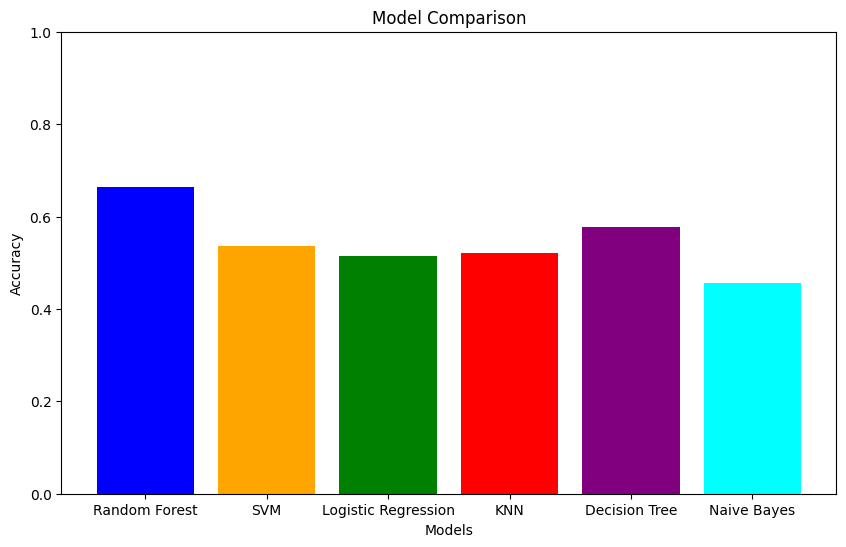

In [33]:
# Model names and their corresponding accuracy scores
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes']
accuracy_scores = [0.6644897959183673, 0.5363265306122449, 0.5142857142857142, 0.5216326530612245, 0.5771428571428572, 0.4563265306122449]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Assuming accuracy is in the range [0, 1]
plt.show()
